# Executive Summary

Reddit claims to be the front page of the internet, and that's because they are.  With an average of 542 million monthly visitors, of which 234 million are unique, Reddit is the third most visited site in the U.S. and ranked sixth in the world.  Reddit is subdivided into subreddits, which are themed discussion boards created and populated by Reddit users with links, text, videos and images.  These subreddits span an ostensibly endless array of interests including world news, sports, economics, movies, music, fitness, and really anything that anyone has ever thought about and wants to talk about.  Reddit members discuss proposed topics in the comments section, and the most popular comments are "up-voted" to the top of the discussion board an possibly even on the site's landing page.  In 2015, Reddit users submitted nearly 75 million posts and followed up with nearly three quarters of a billion comments.

As such, Reddit is one of the most incredible internet platforms available to date.  Not only is it technologically accessible to anyone with an internet connection, but it is also philosophically accesible in that all people from all walks of life are free to engage in conversation with anyone else in the subreddit of their choosing (provided they follow Reddit's harrassment policies.) But with so many users, submissions, comments, and up-votes, it can also seem impossible to craft a post that will ever see the light of day.  

But viral posts are not flukes.  In fact, they usually hue closely to established patterns and trends.  Once the trends are uncovered, anyone can write a popular post that will likely appeal to a wide audience and gain traction within the targeted discussion board. 

Using data science techniques like exploratory data analysis, predictive modeling, and natural language processing allows us to effiently search through thousands (and millions, if the project calls for it) data points to identify what matters and what doesn't - in other words, what sinks an article and what makes it swim.  Specifically, when analyzing text within titles, posts, and comments, we can vectorize words to identify which ones are more frequently used, and therefore appropriated.  Themes rise from posts when aggregating text in word clouds.  Comments can be analyzed for sentiment using prepackaged libraries to identify how users are engaging with the content.  

With an endless supply of things to read on the internet, it seems impossible to write a post that anyone else but your mom will read.  Data science undeniably refutes this assumption.  Rather, with a few (hundred) keystrokes, a platform as wild as Reddit can be neatly distilled into a handful of targeted insights.



In [1]:
# Import Packages

# API
import requests
import time
import datetime
import json
from bs4 import BeautifulSoup
# import praw

# Analysis

import pandas as pd
import numpy as np

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Plots

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline
%autocall 1
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display, Markdown, Latex, Image

# Natural Language Processing

from nltk.stem import WordNetLemmatizer
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
import markovify as mk

Automatic calling is: Smart


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# API Pull Set-Up

# URL = "http://www.reddit.com/hot.json"

# headers={'User-agent': 'jess-chace Bot 0.1'}

# res = requests.get(URL, headers=headers)
# soup = BeautifulSoup(res.content, 'lxml')
# res.status_code

In [3]:
# data = res.json()

In [4]:
# data['data']

In [5]:
# API Pull from Reddit for 5,000 posts

# posts = []
# after = None

# for i in range(200):
#     print(i)
#     if after == None:
#         params = {}
#     else: 
#         params = {'after': after}
#     url = URL
#     res = requests.get(url, params=params, headers=headers)
#     if res.status_code == 200:
#         data = res.json()
#         posts.extend(data['data']['children'])
#         after = data['data']['after']
        
#     else:
#         print(res.status_code)
#         break
#     time.sleep(3)
    
# print (datetime.datetime.utcnow())
# print (time.time())
# print (time.ctime())

In [6]:
# Store Results of API pull into variables

# author = [post['data']['author'] for post in posts]
# title = [post['data']['title'] for post in posts]
# subreddit = [post['data']['subreddit'] for post in posts]
# subreddit_subscribers = [post['data']['subreddit_subscribers'] for post in posts]
# score = [post['data']['score'] for post in posts]
# ups = [post['data']['ups'] for post in posts]
# downs = [post['data']['downs'] for post in posts]
# num_comments = [post['data']['num_comments'] for post in posts]
# num_crossposts = [post['data']['num_crossposts'] for post in posts]
# text = [post['data']['selftext'] for post in posts]
# pinned = [post['data']['pinned'] for post in posts]
# stickied = [post['data']['stickied'] for post in posts]
# wls = [post['data']['wls'] for post in posts]
# created_utc = [post['data']['created_utc'] for post in posts]
# pulled_utc = 1527880293.3702872


In [7]:
# Create DataFrame of Pull Results

# Reddit = pd.DataFrame([post['data']['author'] for post in posts], 
#              columns=['Author'],
#              index=[post['data']['id'] for post in posts])

# Reddit['Title'] = [post['data']['title'] for post in posts]
# Reddit['SubReddit'] = [post['data']['subreddit'] for post in posts]
# Reddit['SubReddit_Subscribers'] = subreddit_subscribers
# Reddit['Score'] = score
# Reddit['Ups'] = ups
# Reddit['Downs'] = downs
# Reddit['Num_Comments'] = num_comments
# Reddit['Num_Crossposts'] = num_crossposts
# Reddit['Text'] = text
# Reddit['Pinned'] = pinned
# Reddit['Stickied'] = stickied
# Reddit['WLS'] = wls
# Reddit['Created_UTC'] = created_utc
# Reddit['Pulled_UTC'] = 1527880293.3702872

# Reddit['Time_Up'] = Reddit['Pulled_UTC'] - Reddit['Created_UTC']

# Reddit.index.rename('Id', inplace=True)

In [8]:
# Reddit

In [9]:
# Export to csv to avoid having to repull

# Reddit.to_csv('./Reddit')

In [10]:
# Load Data pulled from Reddit

Reddit = pd.read_csv('./Reddit')

In [11]:
uniquesubreddits = Reddit.groupby(['SubReddit']).sum()
len(uniquesubreddits)

1950

In [12]:
uniquesubreddits.sort_values(['SubReddit_Subscribers'],ascending=False).head(20)

,SubReddit_Subscribers,Score,Ups,Downs,Num_Comments,Num_Crossposts,Pinned,Stickied,WLS,Created_UTC,Pulled_UTC,Time_Up
SubReddit,,,,,,,,,,,,
funny,412170105,113454,113454,0,3027,17,0.0,0.0,126.0,3.208498e+10,3.207617e+10,-8.809046e+06
todayilearned,395679314,221551,221551,0,5309,20,0.0,0.0,126.0,3.208473e+10,3.207617e+10,-8.562389e+06
gaming,382102366,140262,140262,0,8542,21,0.0,0.0,120.0,3.208490e+10,3.207617e+10,-8.730713e+06
aww,361566598,308835,308835,0,3888,29,0.0,0.0,126.0,3.208488e+10,3.207617e+10,-8.713784e+06
pics,355289984,295713,295713,0,7871,30,0.0,0.0,114.0,2.902901e+10,2.902130e+10,-7.716663e+06
worldnews,338186535,107341,107341,0,8093,10,0.0,0.0,108.0,2.750131e+10,2.749386e+10,-7.455556e+06
AskReddit,328170223,61156,61156,0,44513,5,0.0,0.0,102.0,2.597322e+10,2.596642e+10,-6.802315e+06
gifs,307343070,354599,354599,0,7986,80,0.0,0.0,114.0,2.902896e+10,2.902130e+10,-7.663889e+06
videos,302774183,48003,48003,0,5458,8,0.0,0.0,102.0,2.597334e+10,2.596642e+10,-6.914959e+06


In [13]:
# Explore Data

print(f" Shape of Data Set: {Reddit.shape}")
print(Reddit.info())
print(Reddit.describe())
print(f" Total Null values: {Reddit.isnull().sum().sum()}")
null_values = Reddit.isnull().sum()
columns_with_null_values = null_values[null_values > 0]
print(f" Columns with Null Values: {columns_with_null_values}")
Reddit_obj = Reddit.select_dtypes(exclude=[np.number])
Reddit_num = Reddit.select_dtypes(include=[np.number])

# Mean Num of Comments: 75.890400
# Median Num of Comments: 16

# Num_Comments:
25%        6  
50%       16          
75%       44

 Shape of Data Set: (5000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
Id                       5000 non-null object
Author                   5000 non-null object
Title                    5000 non-null object
SubReddit                5000 non-null object
SubReddit_Subscribers    5000 non-null int64
Score                    5000 non-null int64
Ups                      5000 non-null int64
Downs                    5000 non-null int64
Num_Comments             5000 non-null int64
Num_Crossposts           5000 non-null int64
Text                     416 non-null object
Pinned                   5000 non-null bool
Stickied                 5000 non-null bool
WLS                      4316 non-null float64
Created_UTC              5000 non-null float64
Pulled_UTC               5000 non-null float64
Time_Up                  5000 non-null float64
dtypes: bool(2), float64(4), int64(6), object(5)
memory usage: 595.8+ KB
None
       Su

31

In [14]:
# Clean Data

Reddit.WLS.fillna(6, inplace=True)

Reddit.Text.fillna(0, inplace=True)

# Encode Boolean Columns

Reddit['IsPinned'] = Reddit['Pinned'].map(lambda x: 1 if x == True else 0)

Reddit['IsStickied'] = Reddit['Stickied'].map(lambda x: 1 if x == True else 0)

# Drop Object Columns

Reddit.drop(['Pinned', 'Stickied'], axis=1, inplace=True)

In [15]:
Reddit.isnull().sum()

Id                       0
Author                   0
Title                    0
SubReddit                0
SubReddit_Subscribers    0
Score                    0
Ups                      0
Downs                    0
Num_Comments             0
Num_Crossposts           0
Text                     0
WLS                      0
Created_UTC              0
Pulled_UTC               0
Time_Up                  0
IsPinned                 0
IsStickied               0
dtype: int64

In [16]:
# Feature Engineering

# Encode Hot Posts

Reddit['HOT'] = Reddit['Num_Comments'].map(lambda x: 1 if x >= 13 else 0)

# Encode Super Hot Posts

Reddit['SUPER_HOT'] = Reddit['Num_Comments'].map(lambda x: 1 if x >= 1000 else 0)

In [27]:
# Train-Train-Split on Data Set

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

y = Reddit['HOT']
X = Reddit.drop(['HOT', 'SUPER_HOT'], axis=1)

# X = Reddit[not_target]
# y = Reddit[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Vectorize Words in Titles

# CVEC fit
  
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english',max_features=20)
cvec.fit(X_train['Title'])

cvec_titles = pd.DataFrame(cvec.transform(X_train['Title']).todense(),
                       columns=cvec.get_feature_names())

In [29]:
# cvec = CountVectorizer(stop_words='english',max_features=20)
# cvec.fit(X_train['Title'])

cvec_titles_test = pd.DataFrame(cvec.transform(X_test['Title']).todense(),
                       columns=cvec.get_feature_names())

In [30]:
X_train = pd.concat([X_train.reset_index(drop=True), cvec_titles],
                    axis=1).select_dtypes(include=['number'])

In [34]:
# Feature Importances for Random Forest Classifier

params = {'n_estimators' : [10, 15, 20],
          'max_depth' : [None, 2, 3, 4, 5]}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)

rf_gs = rf_gs.fit(X_train, y_train)

best_rf_gs = rf_gs.best_estimator_

feat_imps = pd.DataFrame(list(zip(X_train.columns, rf_gs.best_estimator_.feature_importances_)))
feat_imps

,0,1
0,SubReddit_Subscribers,0.024722
1,Score,0.086294
2,Ups,0.072523
3,Downs,0.000000
4,Num_Comments,0.760779
5,Num_Crossposts,0.006181
6,WLS,0.002072
7,Created_UTC,0.016032
8,Pulled_UTC,0.000000
9,Time_Up,0.020978


In [74]:
feat_imps_df = pd.DataFrame(feat_imps)

In [77]:
feat_imps_df.sort_values(1, ascending=False)

,0,1
4,Num_Comments,0.760779
1,Score,0.086294
2,Ups,0.072523
0,SubReddit_Subscribers,0.024722
9,Time_Up,0.020978
7,Created_UTC,0.016032
5,Num_Crossposts,0.006181
6,WLS,0.002072
13,day,0.001175
19,like,0.001016


In [35]:
X_test = pd.concat([X_test.reset_index(drop=True), cvec_titles_test], 
          axis=1).select_dtypes(include=['number'])

In [36]:
# Standard Scaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [37]:
# Pipelines Set-Up

ss = StandardScaler()

logreg = LogisticRegression()

SGD = SGDClassifier()

knn = KNeighborsClassifier()

bNB = BernoulliNB()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()


In [38]:
# Pipeline through Logistic Regression

from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([
    ('ss', ss),
    ('logreg', logreg)
])

params = {
    'logreg__penalty':['l1','l2'],
    'logreg__solver':['liblinear'],
    'logreg__C':np.logspace(-5,0,100)
}

logreg_gs = GridSearchCV(logreg_pipe, param_grid=params, cv=5)
logreg_gs.fit(X_train, y_train)

best_logreg_gs = logreg_gs.best_estimator_

logreg_gs_train = best_logreg_gs.score(X_train, y_train)
logreg_gs_test = best_logreg_gs.score(X_test, y_test)

In [39]:
# Pipeline through SGDClassifier

from sklearn.pipeline import Pipeline

SGD_pipe = Pipeline([
    ('ss', ss),
    ('SGD', SGD)
])

params = {
    'SGD__loss': ['hinge', 'log', 'modified_huber',
    'squared_hinge', 'perceptron'],
    'SGD__penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'SGD__learning_rate': ['constant', 'optimal', 'invscaling'],
    'SGD__eta0' : [1]
}

SGD_gs = GridSearchCV(SGD_pipe, param_grid=params, cv=5)
SGD_gs.fit(X_train, y_train)

best_SGD_gs = SGD_gs.best_estimator_

SGD_gs_train = best_SGD_gs.score(X_train, y_train)
SGD_gs_test = best_SGD_gs.score(X_test, y_test)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

In [40]:
# Pipeline through kNN Classification

knn_pipe = Pipeline([
    ('ss', ss),
    ('knn', knn)
])

params = {
    'knn__n_neighbors':[1,3,5,9,15,21],
    'knn__weights':['uniform','distance'],
    'knn__metric':['euclidean','manhattan']
}

knn_gs = GridSearchCV(knn_pipe, param_grid=params)
knn_gs.fit(X_train, y_train)

best_knn_gs = knn_gs.best_estimator_

knn_gs_train = best_knn_gs.score(X_train, y_train)
knn_gs_test = best_knn_gs.score(X_test, y_test)

In [41]:
# Pipeline through BernoulliNB

from sklearn.pipeline import Pipeline

bNB_pipe = Pipeline([
    ('ss', ss),
    ('bNB', bNB)
])

params = {
    'bNB__alpha': np.logspace(-5,0,100)
}

bNB_gs = GridSearchCV(bNB_pipe, param_grid=params, cv=5)
bNB_gs.fit(X_train, y_train)

best_bNB_gs = bNB_gs.best_estimator_

bNB_gs_train = best_bNB_gs.score(X_train, y_train)
bNB_gs_test = best_bNB_gs.score(X_test, y_test)

In [42]:
# Pipeline through Decision Tree Classifier

from sklearn.pipeline import Pipeline

dt_pipe = Pipeline([
    ('ss', ss),
    ('dt', dt)
])

params = {'dt__max_depth': [3,4,7,10,None],
         'dt__min_samples_split': range(2, 10)}

dt_gs = GridSearchCV(dt_pipe, param_grid=params, cv=5)
dt_gs.fit(X_train, y_train)

best_dt_gs = dt_gs.best_estimator_

dt_gs_train = best_dt_gs.score(X_train, y_train)
dt_gs_test = best_dt_gs.score(X_test, y_test)

In [43]:
# Pipeline through Random Forest Classifier

from sklearn.pipeline import Pipeline

rf_pipe = Pipeline([
    ('ss', ss),
    ('rf', rf)
])

params = {'rf__n_estimators' : [10, 15, 20],
          'rf__max_depth' : [None, 2, 3, 4, 5]}

rf_gs = GridSearchCV(rf_pipe, param_grid=params, cv=5)
rf_gs.fit(X_train, y_train)

best_rf_gs = rf_gs.best_estimator_

rf_gs_train = best_rf_gs.score(X_train, y_train)
rf_gs_test = best_rf_gs.score(X_test, y_test)

In [44]:
# Baseline Accuracy

1 - sum(Reddit['HOT'])/len(Reddit['HOT'])

0.42779999999999996

In [45]:
# Model Selection Executive Summary

print('GridSearchCV across LogisticRegression:')
print(f"Best Parameters = {logreg_gs.best_params_}")
print(f"Best CV Score = {logreg_gs.best_score_}")
print(f"Train Score = {logreg_gs_train}")
print(f"Test Score = {logreg_gs_test}")
print()

print('GridSearchCV across SGDClassifier:')
print(f"Best Parameters = {SGD_gs.best_params_}")
print(f"Best CV Score = {SGD_gs.best_score_}")
print(f"Train Score = {SGD_gs_train}")
print(f"Test Score = {SGD_gs_test}")
print()

print('GridSearchCV across kNN Classification:')
print(f"Best Parameters = {knn_gs.best_params_}")
print(f"Best CV Score = {knn_gs.best_score_}")
print(f"Train Score = {knn_gs_train}")
print(f"Test Score = {knn_gs_test}")
print()

print('GridSearchCV across BernoulliNB:')
print(f"Best Parameters = {bNB_gs.best_params_}")
print(f"Best CV Score = {bNB_gs.best_score_}")
print(f"Train Score = {bNB_gs_train}")
print(f"Test Score = {bNB_gs_test}")
print()

print('GridSearchCV across Decision Tree:')
print(f"Best Parameters = {dt_gs.best_params_}")
print(f"Best CV Score = {dt_gs.best_score_}")
print(f"Train Score = {dt_gs_train}")
print(f"Test Score = {dt_gs_test}")
print()

print('GridSearchCV across Random Forest:')
print(f"Best Parameters = {rf_gs.best_params_}")
print(f"Best CV Score = {rf_gs.best_score_}")
print(f"Train Score = {rf_gs_train}")
print(f"Test Score = {rf_gs_test}")
print()

GridSearchCV across LogisticRegression:
Best Parameters = {'logreg__C': 0.10974987654930568, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best CV Score = 0.8610666666666666
Train Score = 0.8514666666666667
Test Score = 0.8568

GridSearchCV across SGDClassifier:
Best Parameters = {'SGD__eta0': 1, 'SGD__learning_rate': 'optimal', 'SGD__loss': 'perceptron', 'SGD__penalty': 'l1'}
Best CV Score = 0.9077333333333333
Train Score = 0.9394666666666667
Test Score = 0.936

GridSearchCV across kNN Classification:
Best Parameters = {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best CV Score = 0.8117333333333333
Train Score = 1.0
Test Score = 0.788

GridSearchCV across BernoulliNB:
Best Parameters = {'bNB__alpha': 0.05462277217684343}
Best CV Score = 0.6856
Train Score = 0.6877333333333333
Test Score = 0.6904

GridSearchCV across Decision Tree:
Best Parameters = {'dt__max_depth': 3, 'dt__min_samples_split': 2}
Best CV Score = 1.0
Train Score = 1.0
Test Sc

In [46]:
# Set Model Results to DataFrame

logreg_results = pd.DataFrame.from_dict(logreg_gs.cv_results_)

SGD_results = pd.DataFrame.from_dict(SGD_gs.cv_results_)

knn_results = pd.DataFrame.from_dict(knn_gs.cv_results_)

BernoulliNB_results = pd.DataFrame.from_dict(bNB_gs.cv_results_)

decisiontree_results = pd.DataFrame.from_dict(dt_gs.cv_results_)

randomforest_results = pd.DataFrame.from_dict(rf_gs.cv_results_)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jes

In [81]:
decisiontree_results.sort_values('mean_test_score', ascending=False).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__max_depth,param_dt__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004634,0.000606,0.000645,0.000042,3,2,"{'dt__max_depth': 3, 'dt__min_samples_split': 2}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


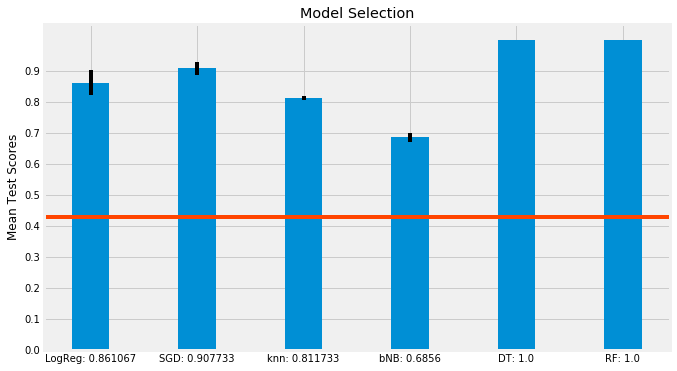

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6),
          facecolor='w',
          edgecolor='r')

N = 6
mean_test_score = (0.861067, 0.907733, 0.811733, 0.6856, 1.0, 1.0)

std_test_score = (0.040278, 0.021345, 0.006183, 0.014183, 0.0, 0.0)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, mean_test_score, width, yerr=std_test_score)

plt.ylabel('Mean Test Scores')
plt.title('Model Selection', )
plt.xticks(np.arange(6),['LogReg: 0.861067', 'SGD: 0.907733', 'knn: 0.811733', 'bNB: 0.6856', 
                         'DT: 1.0', 'RF: 1.0'])
plt.yticks(np.arange(0, 1.0, 0.1))
plt.axhline(y=0.42779999999999996, linewidth=4, color='#FF4500')

plt.show()

In [50]:
# Masking for Text Data in Posts

WithText = Reddit[(Reddit['Text'] != 0)]

WithText_Hot = Reddit[(Reddit['Text'] != 0) & (Reddit['HOT']==1)]

WithText_Super_Hot = Reddit[(Reddit['Text'] != 0) & (Reddit['SUPER_HOT']==1)]

WithText_NotHot = Reddit[(Reddit['Text'] != 0) & (Reddit['HOT']==0)]

In [51]:
# Corpus of Hot Words in Posts with Text

hot = []

for row in WithText_Hot['Text']:
        hot.append(row)
    

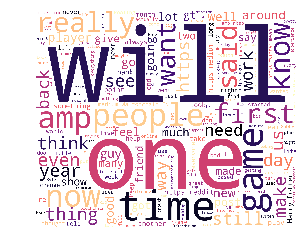

In [52]:
# WordCloud for Hot Docs

hotstring = " ".join(hot)

wordcloud = WordCloud(    colormap='magma',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(hotstring)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
# Corpus of Super Hot Words in Posts with Text

superhot = []

for row in WithText_Super_Hot['Text']:
        superhot.append(row)

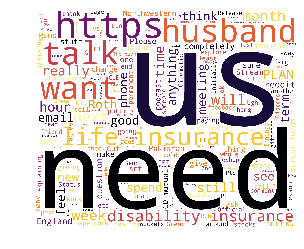

In [54]:
# WordCloud for Super Hot Docs

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

superhotstring = " ".join(superhot)

wordcloud = WordCloud(    colormap='inferno',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(superhotstring)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [55]:
# Corpus of Cold Words in Posts with Text

cold = []

for row in WithText_NotHot['Text']:
        cold.append(row)

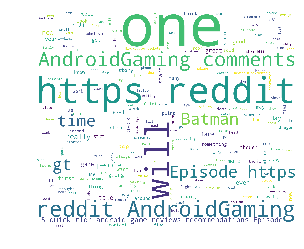

In [56]:
# WordCloud for Cold Docs

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

coldstring = " ".join(cold)

wordcloud = WordCloud(    colormap='viridis',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=2400,
                          height=2000
                         ).generate(coldstring)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [57]:
# Mask of Top 50 Most Commented on Posts

Top50 = Reddit.sort_values(['Num_Comments'], ascending=False).head(50)
Top50[['Id','Title', 'SubReddit', 'SubReddit_Subscribers', 'Num_Comments']]

,Id,Title,SubReddit,SubReddit_Subscribers,Num_Comments
420,8nogl0,What celebrity has skeletons in their closet t...,AskReddit,19304088,20246
3009,8nmvqb,"What food has made you wonder ""how did our anc...",AskReddit,19304127,4731
4963,8nlhuo,What's a shallow reason you wouldn't date some...,AskReddit,19304150,4456
633,8npdh5,One Piece: Chapter 906,OnePiece,167348,4186
344,8nnoyh,My doctor charges me $65 for being fat,Wellthatsucks,691651,3761
4016,8nmewn,"Trudeau responds to Trump Tariffs: ""We have to...",worldnews,18788144,3488
157,8nr4pb,What's a good movie everyone should watch but ...,AskReddit,19304083,3460
1098,8nneak,"""ARAB ANDY"" scares the shit out of a college c...",LivestreamFail,260629,3316
1682,8nneak,"""ARAB ANDY"" scares the shit out of a college c...",LivestreamFail,260629,3316
4569,8np3js,"""YE"" Album - First Thoughts Mega-Thread",Kanye,146302,2664


In [58]:
# API Pull Set-Up of Comments with Praw

# reddit = praw.Reddit(user_agent='',
#                      client_id='', client_secret='')

In [59]:
# Get Comments for Top 50 posts

# comments = {}

# for row in Top50['Id']:
#     submission = reddit.submission(row)

#     submission.comments.replace_more(limit=None)
#     for comment in submission.comments.list():
# #         print(row, comment.body)
#             comments[row] = []
    
#     comments[row].append(comment.body)

In [60]:
# Send pull to csv

# comments_df = pd.DataFrame.from_dict(comments)
# comments_df = comments_df.T

# comments_df.to_csv('./comments')

In [61]:
# Read in Comments Data

comments = pd.read_csv('./comments')

In [62]:
comments.rename(columns={'Unnamed: 0': 'Id', '0': 'Comment'}, inplace=True)
comments

,Id,Comment
0,8nl606,"😂😂😂😂😂 you're just a dumb, impotent, angry litt..."
1,8nlanp,My only point is that recoup your losses is a ...
2,8nlf5f,No worries. If you sin then you need to repent...
3,8nlhuo,Opportunities are always presenting themselves...
4,8nlqwk,You just ignored the broader point of everythi...
5,8nm0fl,"No, I already have, doesn’t work. Did you know..."
6,8nm73x,"Apparently, my well rounded education seems to..."
7,8nmewn,Believing his lies seems to be one simple way.
8,8nmhhi,You are quickly becoming my favourite Reddit a...
9,8nmow9,Periscopes are cool.


In [63]:
# Sentiment Analysis of Top Comment in Top 50 Posts

sid = SentimentIntensityAnalyzer()

compound_scores = []

for row in comments.Comment:
    ss = sid.polarity_scores(row)
    print(ss)
    
    compound_scores.append(ss)

{'neg': 0.211, 'neu': 0.732, 'pos': 0.057, 'compound': -0.7744}
{'neg': 0.146, 'neu': 0.692, 'pos': 0.163, 'compound': 0.2249}
{'neg': 0.211, 'neu': 0.622, 'pos': 0.168, 'compound': -0.5423}
{'neg': 0.023, 'neu': 0.736, 'pos': 0.241, 'compound': 0.9804}
{'neg': 0.113, 'neu': 0.806, 'pos': 0.081, 'compound': -0.427}
{'neg': 0.377, 'neu': 0.549, 'pos': 0.073, 'compound': -0.8519}
{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.6249}
{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.106, 'neu': 0.757, 'pos': 0.137, 'compound': 0.0601}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.2732}
{'neg': 0.152, 'neu': 0.791, 'pos': 0.057, 'compound': -0.765}
{'neg': 0.163, 'neu': 0.769, 'pos': 0.068, 'compound': -0.4939}
{'neg': 0.17, 'neu': 0

In [64]:
# Make New DataFrames of Analyzed Comments, Then Join on Top50 for Full Analysis

compound_scores = pd.DataFrame(compound_scores)

comments_scores = pd.concat([comments, compound_scores], axis=1)

joined = pd.merge(comments_scores, Top50, on='Id', how='outer')

In [65]:
# Sort Descending on Best Compound Scores on Top Comment of Top50 Posts

bringittogether = joined.sort_values('compound', ascending=False)
bringittogether

,Id,Comment,compound,neg,neu,pos,Author,Title,SubReddit,SubReddit_Subscribers,...,Num_Crossposts,Text,WLS,Created_UTC,Pulled_UTC,Time_Up,IsPinned,IsStickied,HOT,SUPER_HOT
3,8nlhuo,Opportunities are always presenting themselves...,0.9804,0.023,0.736,0.241,SenileNazi,What's a shallow reason you wouldn't date some...,AskReddit,19304150,...,1,0,6.0,1.527796e+09,1.527437e+09,-359731.167889,0,0,1,1
37,8nqxw1,Superjail is pretty good. I still love Futuram...,0.9081,0.000,0.392,0.608,JamesOldie,I did what any gamer would do to get their gf ...,gaming,18195333,...,0,0,6.0,1.527850e+09,1.527437e+09,-413542.167889,0,0,1,1
27,8nornq,Most titans of industry who acquired 10+ billi...,0.9062,0.053,0.624,0.324,mvea,Elon Musk Responds to Boeing's Claims It Will ...,Futurology,13033147,...,1,0,6.0,1.527824e+09,1.527437e+09,-387557.167889,0,0,1,1
29,8np2qv,Because... God is that conversation boring. W...,0.8588,0.028,0.782,0.190,Jackson160,What's a life lession that you learned from a ...,AskReddit,19304130,...,0,0,6.0,1.527827e+09,1.527437e+09,-390554.167889,0,0,1,1
32,8npdh5,Thanks :),0.7096,0.000,0.000,1.000,Sakata_Kintoki,One Piece: Chapter 906,OnePiece,167348,...,0,"**Chapter 906: ""The Holy Land Mary Geoise""**\n...",6.0,1.527830e+09,1.527437e+09,-393537.167889,0,0,1,1
25,8nogl0,I find it quite funny that you’re resorting to...,0.6697,0.172,0.450,0.378,ReeceInTheDarkness,What celebrity has skeletons in their closet t...,AskReddit,19304088,...,1,0,6.0,1.527821e+09,1.527437e+09,-384745.167889,0,0,1,1
7,8nm73x,"Apparently, my well rounded education seems to...",0.6249,0.000,0.718,0.282,isometricLife,"Redditors of the US, how would you feel about ...",AskReddit,19304131,...,1,0,6.0,1.527802e+09,1.527437e+09,-364975.167889,0,0,1,1
8,8nm73x,"Apparently, my well rounded education seems to...",0.6249,0.000,0.718,0.282,isometricLife,"Redditors of the US, how would you feel about ...",AskReddit,19304131,...,1,0,6.0,1.527802e+09,1.527437e+09,-364975.167889,0,0,1,1
48,8nsifi,Nice,0.4215,0.000,0.000,1.000,Zouroark,Bless Online trailer plagiarized How to train ...,gaming,18195312,...,3,0,6.0,1.527865e+09,1.527437e+09,-428712.167889,0,0,1,1
30,8np3js,Yikes by far I think it’s mainly because I saw...,0.3818,0.101,0.721,0.178,avayr44,"""YE"" Album - First Thoughts Mega-Thread",Kanye,146302,...,0,Please remember :\n\n- **Do NOT downvote** jus...,6.0,1.527827e+09,1.527437e+09,-390793.167889,0,1,1,1


In [66]:
# Example post to pitch given neutrality of comment, relevant subreddit, amount of subscribers, and high score

dataisbeautiful = joined[joined['SubReddit']=='dataisbeautiful']
dataisbeautiful.T

,46
Id,8nrndc
Comment,Sorry if I read between the lines unnecessaril...
compound,0.2401
neg,0.06
neu,0.835
pos,0.105
Author,divergentdata
Title,Fraction of Total Videogame Sales by Genre [OC]
SubReddit,dataisbeautiful
SubReddit_Subscribers,13056843


In [67]:
# Sentiment Analysis Plot

# import plotly
# import plotly.graph_objs as go
# import plotly.plotly as py

# layout = go.Layout(
#     autosize=True,
#     title='Sentiment Analysis of Top Comments',
#     titlefont = {'family':'Georgia',
#                  'size': 24},
#     xaxis={'title':'Negative Score'}, 
#     yaxis={'title':'Positive Score'},
#     hovermode= 'closest')

# x0=comments_scores['neg']
# y0=comments_scores['pos']

# comments_scores['text'] = comments_scores['compound']

# trace1 = go.Scatter(x=x0,
#                     y=y0,
#                     mode = 'markers',
#                     marker={'color' : comments_scores['compound'],
#                             'colorscale' : 'Jet',
#                             'size' : 16,
#                             'showscale' : True,
#                             'colorbar' : {'title' : 'Compound Score'}},
#                     hovertext=comments_scores['text'],
#                    text = comments_scores['compound'],
#                    textposition = 'middle right')

# data = [trace1]

# fig = go.Figure(data=data, layout=layout)

# py.iplot(fig)

In [68]:
f = open("hotdataframe", encoding='utf-8')

In [69]:
the = f.read()

text_model = mk.NewlineText(the)

In [70]:
for i in range(1):
    print(text_model.make_sentence_with_start(beginning='I will', strict=False))
print()
for i in range(1):
    print(text_model.make_sentence_with_start(beginning="I can't", strict=False))
print()
for i in range(1):
    print(text_model.make_sentence_with_start(beginning="I'm not", strict=False))
print()
for i in range(1):
    print(text_model.make_sentence_with_start(beginning="Why", strict=False))
print()
for i in range(1):
    print(text_model.make_sentence_with_start(beginning="Women", strict=False))

I will be a jack wagon for some reason.

I can't remember which grocery store it was only a matter of time it took them — for example — to get in trouble over what I talk about is; those rubberbands, laggish &amp; teleporting thralls &amp; NPC's is basically an ICMP protocol ping where the later one is ingame\-protocol based ping.

I'm not even entirely sure what her job is there, but it had no idea how little my body and started to shut. The crowd was completely silent\- not a GREYHOUND or AMTRAK uniform. The cafe is about the amount of reaper kills assigned for Solak has been lowered from 45,000 to 25,000.

Why do tiny particles inside atoms?*

None
